In [34]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize


# Tokenize

In [4]:
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/wuxiaopan/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [5]:
from nltk.corpus import inaugural

corpus = inaugural.raw('1789-Washington.txt')

print(corpus[:1000])


Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

In [23]:

words_token = word_tokenize(corpus.translate(str.maketrans('', '', string.punctuation)))

len(words_token), len(set(words_token))


(1430, 617)

<AxesSubplot:>

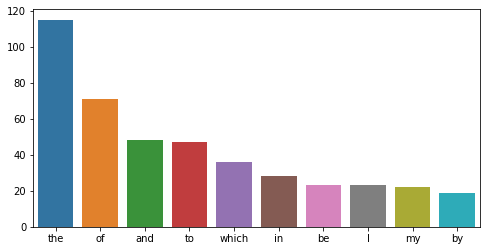

In [33]:
word_counts = pd.Series(words_token).value_counts()[:10]

plt.figure(figsize = (8, 4))
sns.barplot(x=word_counts.index, y=word_counts.values)


# Stemming

In [22]:
words = ['run', 'runner', 'running', 'ran', 'runs', 'easily', 'fairly', 'saw']

p_stemmer = PorterStemmer()
for word in words:
    print(word + '-->' + p_stemmer.stem(word))
    

run-->run
runner-->runner
running-->run
ran-->ran
runs-->run
easily-->easili
fairly-->fairli
saw-->saw


In [23]:

s_stemmer = SnowballStemmer(language='english')
for w in words:
    print(w + ' --> ' + s_stemmer.stem(w))
    

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair
saw --> saw


In [40]:
def stemSentence(sentence, stemming):
    words_token = word_tokenize(sentence)

    stemmed_word_list = []
    for word in words_token:
        stemmed_word_list.append(stemming.stem(word))

    return ' '.join(stemmed_word_list)


In [43]:
stemSentence(
    'fairly, On the eve of her wedding, a young queen sets out to rescue a princess from an enchantment. She casts aside her fine wedding clothes, takes her chain mail and her sword and follows her brave dwarf retainers into the tunnels under the mountain towards the sleeping kingdom. ',
    p_stemmer
)



'fairli , On the eve of her wed , a young queen set out to rescu a princess from an enchant . she cast asid her fine wed cloth , take her chain mail and her sword and follow her brave dwarf retain into the tunnel under the mountain toward the sleep kingdom .'

In [44]:
stemSentence(
    'fairly, On the eve of her wedding, a young queen sets out to rescue a princess from an enchantment. She casts aside her fine wedding clothes, takes her chain mail and her sword and follows her brave dwarf retainers into the tunnels under the mountain towards the sleeping kingdom. ',
    s_stemmer
)



'fair , on the eve of her wed , a young queen set out to rescu a princess from an enchant . she cast asid her fine wed cloth , take her chain mail and her sword and follow her brave dwarf retain into the tunnel under the mountain toward the sleep kingdom .'

# Lemmatization

In [46]:
nltk.download('wordnet') 


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wuxiaopan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [47]:
words = ["grows","leaves","fairly","cats","trouble","running","friendships","easily", "was", "relational","has"]

lemmatizer = WordNetLemmatizer()
lemma_words = [ lemmatizer.lemmatize(w) for w in words ]

lemma_words

['grows',
 'leaf',
 'fairly',
 'cat',
 'trouble',
 'running',
 'friendship',
 'easily',
 'wa',
 'relational',
 'ha']

In [49]:
lemma_words = [ lemmatizer.lemmatize(w, pos='v') for w in words ]
lemma_words


['grow',
 'leave',
 'fairly',
 'cat',
 'trouble',
 'run',
 'friendships',
 'easily',
 'be',
 'relational',
 'have']

In [51]:
def lemmatizeSentence(sentence):
    words_token = word_tokenize(sentence)

    lemmatized_word_list = []
    for word in words_token:
        lemmatized_word_list.append(lemmatizer.lemmatize(word))

    return ' '.join(lemmatized_word_list)


In [52]:
lemmatizeSentence('fairly, On the eve of her wedding, a young queen sets out to rescue a princess from an enchantment. She casts aside her fine wedding clothes, takes her chain mail and her sword and follows her brave dwarf retainers into the tunnels under the mountain towards the sleeping kingdom. ')



'fairly , On the eve of her wedding , a young queen set out to rescue a princess from an enchantment . She cast aside her fine wedding clothes , take her chain mail and her sword and follows her brave dwarf retainer into the tunnel under the mountain towards the sleeping kingdom .'

# NGram

In [17]:
nltk.download('reuters')
nltk.download('punkt')


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/wuxiaopan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wuxiaopan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict


In [60]:
def build_reuters_model():
    model = defaultdict(lambda: defaultdict(lambda: 0))

    for sentence in reuters.sents():
        # counts
        for w1, w2, w3 in trigrams(sentence):
            model[(w1, w2)][w3] += 1

    # convert it to the probability
    for w1_w2 in model.keys():
        length = sum(model[w1_w2].values())
        for w3 in model[w1_w2].keys():
            model[w1_w2][w3] /= length

    return model

model = build_reuters_model()


In [65]:
model[('today', 'the')].keys()


dict_keys(['public', 'European', 'Bank', 'price', 'emirate', 'overseas', 'newspaper', 'company', 'Turkish', 'increase', 'options', 'Higher', 'pound', 'Italian', 'time'])

In [81]:
import random

def auto_generate_text():
    start_text = ['It', 'is']

    for i in range(100):
        p = random.random()
        accumulator = 0

        w1_w2 = tuple(start_text[-2:])
        for w3 in model[w1_w2].keys():
            accumulator += model[w1_w2][w3]
    
            if accumulator >= p:
                start_text.append(w3)
                break

    return ' '.join(start_text)
            
    
auto_generate_text()


'It is essential if the Japan - to ensure we have so far produced results -- Lufeng 13 - 1 / 4 at 26 degrees ( fahrenheit )," Krenzler said . Basically , their cash credits dropped 400 mln dlrs . s . energy futures , the officials said the modernization would involve an exchange spokeswoman said the authorities would have to be competitive .'